## Import Libraries

In [20]:
import numpy as np
import random 
from PIL import Image
import matplotlib.pyplot as plt
import os

## Import Data-CroppedYaleB

In [21]:
# Get the list of all files and directories 
# in the root directory 
path = "./Data/CroppedYaleB"
dir_list = os.listdir(path) 
  
print("Files and directories in '", path, "' :")  
  
# print the list 
print(dir_list)

Files and directories in ' C:/Users/Administrator/Downloads/COMP5328/Data/CroppedYaleB ' :
['.DS_Store', 'yaleB01', 'yaleB02', 'yaleB03', 'yaleB04', 'yaleB05', 'yaleB06', 'yaleB07', 'yaleB08', 'yaleB09', 'yaleB10', 'yaleB11', 'yaleB12', 'yaleB13', 'yaleB15', 'yaleB16', 'yaleB17', 'yaleB18', 'yaleB19', 'yaleB20', 'yaleB21', 'yaleB22', 'yaleB23', 'yaleB24', 'yaleB25', 'yaleB26', 'yaleB27', 'yaleB28', 'yaleB29', 'yaleB30', 'yaleB31', 'yaleB32', 'yaleB33', 'yaleB34', 'yaleB35', 'yaleB36', 'yaleB37', 'yaleB38', 'yaleB39']


In [22]:
images, labels = [], []
reduce_size = 4
root = "./Data/CroppedYaleB"
for i, person in enumerate(sorted(os.listdir(root))):
    if not os.path.isdir(os.path.join(root, person)):
        continue
    else:    
        for fname in os.listdir(os.path.join(root, person)):            
            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            
            elif fname.endswith('.pgm'):           
                # load image.
                img = Image.open(os.path.join(root, person, fname))
                img = img.convert('L') # grey image.

                #reduce computation complexity.
                
                img = img.resize([s//reduce_size for s in img.size])

                # convert image to numpy array.
                img = np.asarray(img)

                # collect data and label.
                images.append(img)
                labels.append(i)


### Explore data info

In [23]:
np.shape(img)

(48, 42)

In [24]:
np.shape(np.array(images))

(2414, 48, 42)

### Display a random image

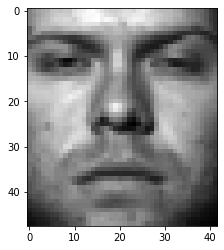

In [25]:
plt.imshow(images[10], cmap="gray")

As computational complexity has been reduced by dividing the image size by a reduce size of 4 for both height and weight, the shape of a single image has been reduced from (192, 168) to (48, 42)

In [26]:
print(type(images))

<class 'list'>


The type of image is list, it could be converted into array type by numpy.array()

### add noises

In [27]:
##add noise - method 1
# Saltpepper noise
import copy
def salt_pepper(image, pr, r, w, h):
    ##create a deep copy of data,recursively inserts copies into it of the objects found in the original.
    image_copy = copy.deepcopy(image) ##avoid alter the original data
    image_copy = np.array(image_copy)
    for idx in range(len(image_copy)):
    # start index of the block
    # define width w and height h
        for i in range (int(pr*w*h)):
            index_w = np.random.randint(0, w)
            index_h = np.random.randint(0, h)
            if np.random.random() > r :
                image_copy[idx][index_w][index_h] = 0
            else:
                image_copy[idx][index_w][index_h] = 255
    return image_copy

In [28]:
salt_pepper_noise = salt_pepper(images, 0.1, 0.5, 48, 42)

p and r are hyperparameters, p is set to control the noise level (no. of modified pixels / total no. of pixels) and equals to 0.1, r is set to control the ratio of being w255 (white) to the number of modified pixel values and equals to 0.5

### display a random image after saltpepper noise

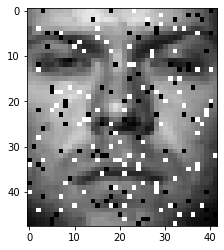

In [29]:
plt.imshow(salt_pepper_noise[10], cmap="gray")

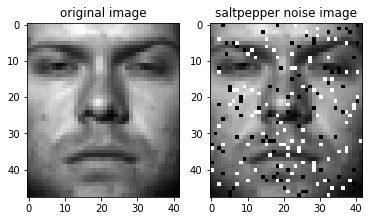

In [30]:
##see effect of adding saltpepper noise
plt.subplot(121)
plt.imshow(images[10], cmap="gray")
plt.title('original image')
plt.subplot(122)
restructured = salt_pepper(images, 0.1, 0.5, 48, 42)
plt.imshow(salt_pepper_noise[10], cmap="gray")
plt.title('saltpepper noise image')
plt.show()

In [31]:
#method 2 gaussian noise
#image_size = (w, h) = (images[0][1], images[0][0])

def gau_generation(image, image_size, g_ratio = 1):
    
    image_copy = copy.deepcopy(image)
    image_copy = np.array(image_copy)
    image_copy = image_copy.reshape(image_copy.shape[0], image_size[0], image_size[1])
    
    ##define gaussian noise
    mean = 0
    var = 10 
    sigma = var**0.5 #standard dev
    
    for i in range(len(image_copy)):
        gauss = np.random.normal(mean, sigma,(image_size[0],image_size[1]))
        gauss = gauss * g_ratio
        image_copy[i] = image_copy[i] + gauss
    
    return image_copy
  

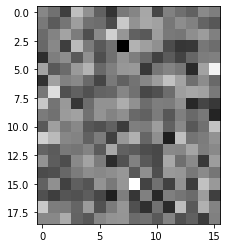

In [32]:
# gaussion noise visualization
mean = 0
var = 10
sigma = var**0.5
gauss = np.random.normal(mean, sigma, (19,16))
plt.imshow(gauss, cmap = "gray")

In [33]:
image_size = (images[0].shape[0], images[0].shape[1])
image_gause = gau_generation(images, image_size, g_ratio = 1)

In [34]:
image_size

(48, 42)

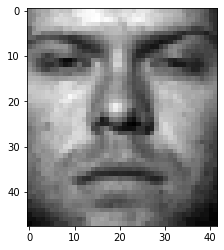

In [35]:
plt.imshow(image_gause[10], cmap="gray")

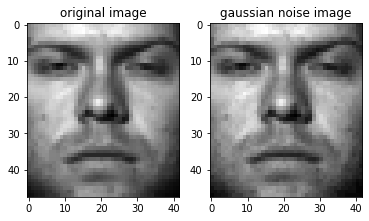

In [36]:
##see effect of adding gaussian noise
plt.subplot(121)
plt.imshow(images[10], cmap="gray")
plt.title('original image')
plt.subplot(122)
restructured = gau_generation(images, image_size, g_ratio = 2)
plt.imshow(image_gause[10], cmap="gray")
plt.title('gaussian noise image')
plt.show()

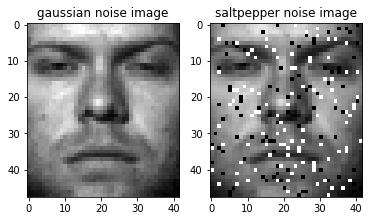

In [37]:
##comparisons of two noise effect
plt.subplot(121)
gau = gau_generation(images, image_size, g_ratio = 2)
plt.imshow(image_gause[10], cmap="gray")
plt.title('gaussian noise image')
plt.subplot(122)
salt = salt_pepper(images, 0.1, 0.5, 48, 42)
plt.imshow(salt_pepper_noise[10], cmap="gray")
plt.title('saltpepper noise image')
plt.show()

### Data Preprocessing

In [38]:
np.array(images).shape

(2414, 48, 42)

In [39]:
image_faces = (images)
image_faces = np.array(image_faces)
image_faces.shape

(2414, 48, 42)

In [40]:
subsample_size = image_faces.shape[0]*0.2
subsample_size

482.8

In [41]:
# use a subsample for training
image_faces_train = image_faces[:482,:,:]
print("image_faces_train shape:",image_faces_train.shape)
n_samples = len(image_faces_train)
print("n_samples size:",n_samples)
image_shape = image_faces_train[0].shape
print("image shape is:", image_shape)

image_faces_train shape: (482, 48, 42)
n_samples size: 482
image shape is: (48, 42)


In [42]:
from random import sample

In [43]:
trial1 = sample(images, 482)
np.array(trial1).shape

(482, 48, 42)

In [44]:
trial1

[array([[114, 107, 106, ...,   9,   6,   2],
        [106, 107, 100, ...,  10,   7,   3],
        [106,  90,  65, ...,  11,   9,   6],
        ...,
        [154, 159, 152, ...,   8,  10,   9],
        [156, 161, 162, ...,   8,  10,  10],
        [157, 163, 171, ...,   8,   9,  10]], dtype=uint8),
 array([[245, 196, 140, ...,   9,   9,   9],
        [249, 209, 152, ...,   9,   9,   9],
        [255, 219, 160, ...,   9,   9,   9],
        ...,
        [201, 165, 131, ...,   9,   5,   3],
        [177, 167, 147, ...,   8,   4,   2],
        [147, 150, 157, ...,   8,   4,   0]], dtype=uint8),
 array([[ 18,  38,  51, ..., 175, 157, 134],
        [ 25,  45,  52, ..., 115, 140, 153],
        [ 23,  34,  38, ...,  74,  81, 116],
        ...,
        [  0,   0,   2, ..., 104,  84,  74],
        [  0,   0,   0, ...,  82,  79, 102],
        [  0,   0,   0, ...,  77, 106,  97]], dtype=uint8),
 array([[  1,   2,   4, ..., 157,  82,  23],
        [  3,   3,   4, ..., 122, 133,  88],
        [  4,   

In [45]:
trial2 = sample(images, 482)
trial3 = sample(images, 482)
trial4 = sample(images, 482)
trial5 = sample(images, 482)

In [46]:
trial1 = np.array(trial1)
trial2 = np.array(trial2)
trial3 = np.array(trial3)
trial4 = np.array(trial4)
trial5 = np.array(trial5)

In [47]:
trial1.shape

(482, 48, 42)

In [48]:
trial_train1 = trial1.reshape(trial1.shape[0], (trial1.shape[1]*trial1.shape[2]))

In [49]:
trial_train1.shape

(482, 2016)

In [50]:
trial_train2 = trial2.reshape(trial2.shape[0], -1)
trial_train3 = trial3.reshape(trial3.shape[0], -1)
trial_train4 = trial4.reshape(trial4.shape[0], -1)
trial_train5 = trial5.reshape(trial5.shape[0], -1)

In [51]:
trial1_gau = gau_generation(trial_train1, image_size, g_ratio=2)
trial2_gau = gau_generation(trial_train2, image_size, g_ratio=2)
trial3_gau = gau_generation(trial_train3, image_size, g_ratio=2)
trial4_gau = gau_generation(trial_train4, image_size, g_ratio=2)
trial5_gau = gau_generation(trial_train5, image_size, g_ratio=2)

In [52]:
trial1_gau.shape

(482, 48, 42)

In [53]:
trial1_gau = trial1_gau.reshape(trial1_gau.shape[0], -1)
trial2_gau = trial2_gau.reshape(trial2_gau.shape[0], -1)
trial3_gau = trial3_gau.reshape(trial3_gau.shape[0], -1)
trial4_gau = trial4_gau.reshape(trial4_gau.shape[0], -1)
trial5_gau = trial5_gau.reshape(trial5_gau.shape[0], -1)

In [54]:
trial1_gau.shape

(482, 2016)

In [55]:
trial1_salt = salt_pepper(trial1, 0.1, 0.5, 48, 42)
trial2_salt = salt_pepper(trial2, 0.1, 0.5, 48, 42)
trial3_salt = salt_pepper(trial3, 0.1, 0.5, 48, 42)
trial4_salt = salt_pepper(trial4, 0.1, 0.5, 48, 42)
trial5_salt = salt_pepper(trial5, 0.1, 0.5, 48, 42)

In [56]:
trial1_salt = trial1_salt.reshape(trial1_salt.shape[0], -1)
trial2_salt = trial2_salt.reshape(trial2_salt.shape[0], -1)
trial3_salt = trial3_salt.reshape(trial3_salt.shape[0], -1)
trial4_salt = trial4_salt.reshape(trial4_salt.shape[0], -1)
trial5_salt = trial5_salt.reshape(trial5_salt.shape[0], -1)

In [57]:
trial1_salt.shape

(482, 2016)

### NMF implementation

In [58]:
## visualize the progress of implementing code
from tqdm import tqdm

In [59]:
## define a simple NMF method that follows the multiplication update rules
def simpleNMF(R, K, steps=1000, max_iterations = 1000):
    rng = np.random.RandomState(1)
    W = rng.rand(482, K)
    H = rng.rand(2016, K)
    for step in range(steps):
        Wu = W*(R.dot(H))/(W.dot(H.T).dot(H))
        Hu = (H.T*(Wu.T.dot(R))/(Wu.T.dot(Wu).dot(H.T))).T
        
        e_W = np.sqrt(np.sum((Wu-W)**2, axis=(0,1)))/W.size
        e_H = np.sqrt(np.sum((Hu-H)**2, axis=(0,1)))/H.size
        if e_W<0.001 and e_H<0.001:
            print('step is:',step)
            break
        W = Wu
        H = Hu
        
    return  W, H

In [60]:
W, H = simpleNMF(trial_train1, 2, max_iterations=100)

step is: 45


In [61]:
print(np.shape(np.array(W)))
print(np.shape(np.array(H)))

(482, 2)
(2016, 2)


In [62]:
#n_components = 
len(set(labels))

38

In [63]:
#result after gaussian noises
W1_estimate_gau, H1_estimate_gau = simpleNMF(trial1_gau, 38, max_iterations=100)
W2_estimate_gau, H2_estimate_gau = simpleNMF(trial2_gau, 38, max_iterations=100)
W3_estimate_gau, H3_estimate_gau = simpleNMF(trial3_gau, 38, max_iterations=100)
W4_estimate_gau, H4_estimate_gau = simpleNMF(trial4_gau, 38, max_iterations=100)
W5_estimate_gau, H5_estimate_gau = simpleNMF(trial5_gau, 38, max_iterations=100)

step is: 1
step is: 1
step is: 1
step is: 1
step is: 1


In [64]:
np.shape(H1_estimate_gau)

(2016, 38)

In [65]:
W1_estimate_salt, H1_estimate_salt = simpleNMF(trial1_salt, 38, max_iterations=100)
W2_estimate_salt, H2_estimate_salt = simpleNMF(trial2_salt, 38, max_iterations=100)
W3_estimate_salt, H3_estimate_salt = simpleNMF(trial3_salt, 38, max_iterations=100)
W4_estimate_salt, H4_estimate_salt = simpleNMF(trial4_salt, 38, max_iterations=100)
W5_estimate_salt, H5_estimate_salt = simpleNMF(trial5_salt, 38, max_iterations=100)


step is: 1
step is: 1
step is: 1
step is: 1
step is: 1


In [66]:
print('==> Evaluate RRE on Gaussian noises .....')
RRE_gau1 = np.linalg.norm((trial_train1 - np.array(W1_estimate_gau).dot(np.array(H1_estimate_gau.T)))) / np.linalg.norm(trial_train1)
RRE_gau2 = np.linalg.norm((trial_train2 - np.array(W2_estimate_gau).dot(np.array(H2_estimate_gau.T)))) / np.linalg.norm(trial_train2)
RRE_gau3 = np.linalg.norm((trial_train3 - np.array(W3_estimate_gau).dot(np.array(H3_estimate_gau.T)))) / np.linalg.norm(trial_train3)
RRE_gau4 = np.linalg.norm((trial_train4 - np.array(W4_estimate_gau).dot(np.array(H4_estimate_gau.T)))) / np.linalg.norm(trial_train4)
RRE_gau5 = np.linalg.norm((trial_train5 - np.array(W5_estimate_gau).dot(np.array(H5_estimate_gau.T)))) / np.linalg.norm(trial_train5)
print('RRE_salt1 = {}'.format(RRE_gau1))
print('RRE_salt2 = {}'.format(RRE_gau2))
print('RRE_salt3 = {}'.format(RRE_gau3))
print('RRE_gau4 = {}'.format(RRE_gau4))
print('RRE_gau5 = {}'.format(RRE_gau5))
total_gau_yaleb = RRE_gau1+RRE_gau2+RRE_gau3+RRE_gau4+RRE_gau5
average_RRE_gau_yaleb = total_gau_yaleb / 5
print('average RRE gaussian for yaleB={} '.format(average_RRE_gau_yaleb))

==> Evaluate RRE on Gaussian noises .....
RRE_salt1 = 0.5751611516361055
RRE_salt2 = 0.5953460169824467
RRE_salt3 = 0.5941119225045925
RRE_gau4 = 0.5682125624791005
RRE_gau5 = 0.5774293922560105
average RRE gaussian for yaleB=0.5820522091716512 


In [67]:
print('==> Evaluate RRE on Saltpepper noises .....')
RRE_salt1 = np.linalg.norm((trial_train1 - np.array(W1_estimate_salt).dot(np.array(H1_estimate_salt.T)))) / np.linalg.norm(trial_train1)
RRE_salt2 = np.linalg.norm((trial_train2 - np.array(W2_estimate_salt).dot(np.array(H2_estimate_salt.T)))) / np.linalg.norm(trial_train2)
RRE_salt3 = np.linalg.norm((trial_train3 - np.array(W3_estimate_salt).dot(np.array(H3_estimate_salt.T)))) / np.linalg.norm(trial_train3)
RRE_salt4 = np.linalg.norm((trial_train4 - np.array(W4_estimate_salt).dot(np.array(H4_estimate_salt.T)))) / np.linalg.norm(trial_train4)
RRE_salt5 = np.linalg.norm((trial_train5 - np.array(W5_estimate_salt).dot(np.array(H5_estimate_salt.T)))) / np.linalg.norm(trial_train5)

print('RRE_salt1 = {}'.format(RRE_salt1))
print('RRE_salt2 = {}'.format(RRE_salt2))
print('RRE_salt3 = {}'.format(RRE_salt3))
print('RRE_salt4 = {}'.format(RRE_salt4))
print('RRE_salt5 = {}'.format(RRE_salt5))
total_salt_yaleb = RRE_salt1+RRE_salt2+RRE_salt3+RRE_salt4+RRE_salt5
average_RRE_salt_yaleb = total_salt_yaleb / 5
print('average RRE salt pepper for yaleB={} '.format(average_RRE_salt_yaleb))

==> Evaluate RRE on Saltpepper noises .....
RRE_salt1 = 0.5362130276380688
RRE_salt2 = 0.5468943936192872
RRE_salt3 = 0.5448319403884407
RRE_salt4 = 0.5289244910105586
RRE_salt5 = 0.5306870762876486
average RRE salt pepper for yaleB=0.5375101857888007 


In [68]:
## Define a L1-RNMF class
class L1RNMF( ):
    def __init__(
            self,
            n_components,
            tol=0.01,
            max_iter=300,
            skip_iter=10,
            lambda_=128):
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.skip_iter = skip_iter
        self.lambda_ = lambda_

    def _compute_loss(self, R, W, H, E):
        return (np.linalg.norm(R - W.dot(H) - E) ** 2 +
                128 * np.sum(np.abs(E)))

    def _update(self, R, W, H):
        # compute E
        E = R - W.dot(H)
        idx_gre = E > 128 / 2
        E[idx_gre] = E[idx_gre] - 128 / 2
        idx_les = E < -128 / 2
        E[idx_les] = E[idx_les] + 128 / 2
        E[np.logical_not(np.logical_or(idx_gre, idx_les))] = 0
        
        # update W
        de_W = 2 * W.dot(H).dot(H.T)
        de_W[de_W == 0] = np.finfo(np.float32).eps
        W = (W * (np.abs((E-R).dot(H.T)) - (E-R).dot(H.T)) /
             de_W)
        
        # update H
        de_H = 2 * W.T.dot(W).dot(H)
        de_H[de_H == 0] = np.finfo(np.float32).eps
        H = (H * (np.abs(W.T.dot(E-R)) - W.T.dot(E-R)) /
             de_H)
    
        # normalize W and H
        nor = np.sqrt(np.sum(np.square(W), axis=0, keepdims=True))
        W = W / nor
        H = H * nor.T
        return W, H, E

    def fit(self, R , n_components):
       
        rng = np.random.RandomState(1)
        W = rng.rand(482, n_components)
        H = rng.rand( n_components,2016)

        los = [self._compute_loss(R, W, H, R - W.dot(H))]
        for iter_ in range(300):
            W, H, E = self._update(R, W, H)
            if iter_ % self.skip_iter == 0:
                los.append(self._compute_loss(R, W, H, E))
                criterion = abs(los[-1] - los[-2]) / los[-2]
            if criterion < 0.001:
                 break
        return W, H, E

In [69]:
data_L1RNMF = L1RNMF(n_components = len(set(labels)))

In [70]:
##result after gaussian noises
W1_estimate_gau_1, H1_estimate_gau_1, E_estimate_gau_1 = data_L1RNMF.fit(trial1_gau, n_components = len(set(labels)))
W2_estimate_gau_1, H2_estimate_gau_1, E_estimate_gau_1 = data_L1RNMF.fit(trial2_gau, n_components = len(set(labels)))
W3_estimate_gau_1, H3_estimate_gau_1, E_estimate_gau_1 = data_L1RNMF.fit(trial3_gau, n_components = len(set(labels)))
W4_estimate_gau_1, H4_estimate_gau_1, E_estimate_gau_1 = data_L1RNMF.fit(trial4_gau, n_components = len(set(labels)))
W5_estimate_gau_1, H5_estimate_gau_1, E_estimate_gau_1 = data_L1RNMF.fit(trial5_gau, n_components = len(set(labels)))

In [71]:
##result after saltpepper noises
W1_estimate_salt_1, H1_estimate_salt_1, E_estimate_salt_1 = data_L1RNMF.fit(trial1_salt, n_components = len(set(labels)))
W2_estimate_salt_1, H2_estimate_salt_1, E_estimate_salt_1 = data_L1RNMF.fit(trial2_salt, n_components = len(set(labels)))
W3_estimate_salt_1, H3_estimate_salt_1, E_estimate_salt_1 = data_L1RNMF.fit(trial3_salt, n_components = len(set(labels)))
W4_estimate_salt_1, H4_estimate_salt_1, E_estimate_salt_1 = data_L1RNMF.fit(trial4_salt, n_components = len(set(labels)))
W5_estimate_salt_1, H5_estimate_salt_1, E_estimate_salt_1 = data_L1RNMF.fit(trial5_salt, n_components = len(set(labels)))

In [72]:
print('==> Evaluate RRE on Gaussian noises via L1RNMF.....')
RRE_gau1_1 = np.linalg.norm((trial_train1 - np.array(W1_estimate_gau_1).dot(np.array(H1_estimate_gau_1)))) / np.linalg.norm(trial_train1)
RRE_gau2_1 = np.linalg.norm((trial_train2 - np.array(W2_estimate_gau_1).dot(np.array(H2_estimate_gau_1)))) / np.linalg.norm(trial_train2)
RRE_gau3_1 = np.linalg.norm((trial_train3 - np.array(W3_estimate_gau_1).dot(np.array(H3_estimate_gau_1)))) / np.linalg.norm(trial_train3)
RRE_gau4_1 = np.linalg.norm((trial_train4 - np.array(W4_estimate_gau_1).dot(np.array(H4_estimate_gau_1)))) / np.linalg.norm(trial_train4)
RRE_gau5_1 = np.linalg.norm((trial_train5 - np.array(W5_estimate_gau_1).dot(np.array(H5_estimate_gau_1)))) / np.linalg.norm(trial_train5)
print('RRE_salt1_1 = {}'.format(RRE_gau1_1))
print('RRE_salt2_1 = {}'.format(RRE_gau2_1))
print('RRE_salt3_1 = {}'.format(RRE_gau3_1))
print('RRE_gau4_1 = {}'.format(RRE_gau4_1))
print('RRE_gau5_1 = {}'.format(RRE_gau5_1))
total_gau_yaleb_1 = RRE_gau1_1+RRE_gau2_1+RRE_gau3_1+RRE_gau4_1+RRE_gau5_1
average_RRE_gau_yaleb_1 = total_gau_yaleb_1 / 5
print('average RRE gaussian for yaleB via L1RNMF={} '.format(average_RRE_gau_yaleb_1))

==> Evaluate RRE on Gaussian noises via L1RNMF.....
RRE_salt1_1 = 0.24050854183585135
RRE_salt2_1 = 0.27571504035373423
RRE_salt3_1 = 0.26163471176626985
RRE_gau4_1 = 0.23994043593693615
RRE_gau5_1 = 0.2649567392015686
average RRE gaussian for yaleB via L1RNMF=0.25655109381887203 


In [73]:
print('==> Evaluate RRE on Saltpepper noises via L1RNMF.....')
RRE_salt1_1 = np.linalg.norm((trial_train1 - np.array(W1_estimate_salt_1).dot(np.array(H1_estimate_salt_1)))) / np.linalg.norm(trial_train1)
RRE_salt2_1 = np.linalg.norm((trial_train2 - np.array(W2_estimate_salt_1).dot(np.array(H2_estimate_salt_1)))) / np.linalg.norm(trial_train2)
RRE_salt3_1 = np.linalg.norm((trial_train3 - np.array(W3_estimate_salt_1).dot(np.array(H3_estimate_salt_1)))) / np.linalg.norm(trial_train3)
RRE_salt4_1 = np.linalg.norm((trial_train4 - np.array(W4_estimate_salt_1).dot(np.array(H4_estimate_salt_1)))) / np.linalg.norm(trial_train4)
RRE_salt5_1 = np.linalg.norm((trial_train5 - np.array(W5_estimate_salt_1).dot(np.array(H5_estimate_salt_1)))) / np.linalg.norm(trial_train5)

print('RRE_salt1_1 = {}'.format(RRE_salt1_1))
print('RRE_salt2_1 = {}'.format(RRE_salt2_1))
print('RRE_salt3_1 = {}'.format(RRE_salt3_1))
print('RRE_salt4_1 = {}'.format(RRE_salt4_1))
print('RRE_salt5_1 = {}'.format(RRE_salt5_1))
total_salt_yaleb_1 = RRE_salt1_1+RRE_salt2_1+RRE_salt3_1+RRE_salt4_1+RRE_salt5_1
average_RRE_salt_yaleb_1 = total_salt_yaleb_1 / 5
print('average RRE Saltpepper for yaleB via L1RNMF={} '.format(average_RRE_salt_yaleb_1))

==> Evaluate RRE on Saltpepper noises via L1RNMF.....
RRE_salt1_1 = 0.19559473327083632
RRE_salt2_1 = 0.20222224587067802
RRE_salt3_1 = 0.2058679329063069
RRE_salt4_1 = 0.19817933256665787
RRE_salt5_1 = 0.2009852600482199
average RRE Saltpepper for yaleB via L1RNMF=0.20056990093253982 


### 　Evaluate Clustering Performance

In [74]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import normalized_mutual_info_score


In [75]:
def assign_cluster_label(X, Y):
    kmeans = KMeans(n_clusters=len(set(Y))).fit(X)
    Y_pred = np.zeros(Y.shape)
    for i in set(kmeans.labels_):
        ind = kmeans.labels_ == i
        Y_pred[ind] = Counter(Y[ind]).most_common(1)[0][0] # assign label.
    return Y_pred

In [76]:
len(labels)

2414

In [77]:
Y_hat_1 = sample(labels, 482)
Y_hat_2 = sample(labels, 482)
Y_hat_3 = sample(labels, 482)
Y_hat_4 = sample(labels, 482)
Y_hat_5 = sample(labels, 482)

In [78]:
Y_hat_1 = np.array(Y_hat_1)
Y_hat_2 = np.array(Y_hat_2)
Y_hat_3 = np.array(Y_hat_3)
Y_hat_4 = np.array(Y_hat_4)
Y_hat_5 = np.array(Y_hat_5)
Y_hat_1.shape

(482,)

In [79]:
print('==> Evaluate Acc and NMI ...')

# Assign cluster labels.
Y_pred1_gau = assign_cluster_label(W1_estimate_gau, Y_hat_1)
acc = accuracy_score(Y_hat_1, Y_pred1_gau)
nmi = normalized_mutual_info_score(Y_hat_1, Y_pred1_gau)
print('Acc(NMI) for gauss 1 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred2_gau = assign_cluster_label(W2_estimate_gau, Y_hat_2)
acc = accuracy_score(Y_hat_2, Y_pred2_gau)
nmi = normalized_mutual_info_score(Y_hat_2, Y_pred2_gau)
print('Acc(NMI) for gauss 2 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred3_gau = assign_cluster_label(W3_estimate_gau, Y_hat_3)
acc = accuracy_score(Y_hat_3, Y_pred3_gau)
nmi = normalized_mutual_info_score(Y_hat_3, Y_pred3_gau)
print('Acc(NMI) for gauss 3 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred4_gau = assign_cluster_label(W4_estimate_gau, Y_hat_4)
acc = accuracy_score(Y_hat_4, Y_pred4_gau)
nmi = normalized_mutual_info_score(Y_hat_4, Y_pred4_gau)
print('Acc(NMI) for gauss 4 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred5_gau = assign_cluster_label(W5_estimate_gau, Y_hat_5)
acc = accuracy_score(Y_hat_5, Y_pred5_gau)
nmi = normalized_mutual_info_score(Y_hat_5, Y_pred5_gau)
print('Acc(NMI) for gauss 5 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))

==> Evaluate Acc and NMI ...
Acc(NMI) for gauss 1 yaleB = 0.1432 (0.2417)
Acc(NMI) for gauss 2 yaleB = 0.1494 (0.2310)
Acc(NMI) for gauss 3 yaleB = 0.1535 (0.2554)
Acc(NMI) for gauss 4 yaleB = 0.1473 (0.2457)
Acc(NMI) for gauss 5 yaleB = 0.1494 (0.2076)


In [80]:
print('average accuracy for gauss YaleB is:',(0.1452 + 0.1452 + 0.1349 + 0.1411 + 0.1432)/5)

average accuracy for gauss YaleB is: 0.14192


In [81]:
print('average NMI for gauss YaleB is:',(0.2423 + 0.2288 + 0.2420 + 0.2205 + 0.2285)/5)

average NMI for gauss YaleB is: 0.23242


In [82]:
print('==> Evaluate Acc and NMI ...')

# Assign cluster labels.
Y_pred1_salt = assign_cluster_label(W1_estimate_salt, Y_hat_1)
acc = accuracy_score(Y_hat_1, Y_pred1_salt)
nmi = normalized_mutual_info_score(Y_hat_1, Y_pred1_salt)
print('Acc(NMI) for salt 1 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred2_salt = assign_cluster_label(W2_estimate_salt, Y_hat_2)
acc = accuracy_score(Y_hat_2, Y_pred2_salt)
nmi = normalized_mutual_info_score(Y_hat_2, Y_pred2_salt)
print('Acc(NMI) for salt 2 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred3_salt = assign_cluster_label(W3_estimate_salt, Y_hat_3)
acc = accuracy_score(Y_hat_3, Y_pred3_salt)
nmi = normalized_mutual_info_score(Y_hat_3, Y_pred3_salt)
print('Acc(NMI) for salt 3 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred4_salt = assign_cluster_label(W4_estimate_salt, Y_hat_4)
acc = accuracy_score(Y_hat_4, Y_pred4_salt)
nmi = normalized_mutual_info_score(Y_hat_4, Y_pred4_salt)
print('Acc(NMI) for salt 4 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred5_salt = assign_cluster_label(W5_estimate_salt, Y_hat_5)
acc = accuracy_score(Y_hat_5, Y_pred5_salt)
nmi = normalized_mutual_info_score(Y_hat_5, Y_pred5_salt)
print('Acc(NMI) for salt 5 yaleB = {:.4f} ({:.4f})'.format(acc, nmi))

==> Evaluate Acc and NMI ...
Acc(NMI) for salt 1 yaleB = 0.1515 (0.2429)
Acc(NMI) for salt 2 yaleB = 0.1307 (0.1871)
Acc(NMI) for salt 3 yaleB = 0.1473 (0.2290)
Acc(NMI) for salt 4 yaleB = 0.1556 (0.2367)
Acc(NMI) for salt 5 yaleB = 0.1432 (0.2194)


In [83]:
print('average accuracy for salt pepper YaleB is:', (0.1452+0.1494+0.1432+0.1369+0.1411)/5)

average accuracy for salt pepper YaleB is: 0.14316


In [84]:
print('average NMI for salt pepper YaleB is:', (0.2018+0.2159+0.2430+0.2200+0.2287)/5)

average NMI for salt pepper YaleB is: 0.22188


## Import Data-ORL

In [85]:
# Get the list of all files and directories 
# in the root directory 
path = "./Data/ORL"
dir_list = os.listdir(path) 
  
print("Files and directories in '", path, "' :")  
  
# print the list 
print(dir_list)

Files and directories in ' C:/Users/Administrator/Downloads/COMP5328/Data/ORL ' :
['.DS_Store', 'README', 's1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


In [86]:
images_ORL, labels_ORL = [], []
reduce_size = 2
root = "./Data/ORL"
for i, person in enumerate(sorted(os.listdir(root))):
    if not os.path.isdir(os.path.join(root, person)):
        continue
    else:    
        for fname in os.listdir(os.path.join(root, person)):    
            
            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            
            elif fname.endswith('.pgm'):
                
            
                # load image.
                img_ORL = Image.open(os.path.join(root, person, fname))
                img_ORL = img_ORL.convert('L') # grey image.

                #reduce computation complexity.
                #reduce size: define 减小倍数
                
                img_ORL = img_ORL.resize([s//reduce_size for s in img_ORL.size])

                # convert image to numpy array.
                img_ORL = np.asarray(img_ORL)

                # collect data and label.
                images_ORL.append(img_ORL)
                labels_ORL.append(i)


### Explore data info

In [87]:
np.shape(img_ORL)

(56, 46)

In [88]:
len(images_ORL)

400

In [89]:
np.shape(np.array(images_ORL))

(400, 56, 46)

### Display a random image

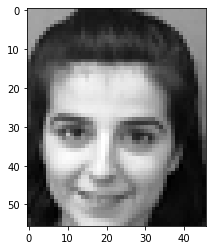

In [90]:
plt.imshow(images_ORL[10], cmap="gray")

As computational complexity has been reduced by dividing the image size by a reduce size of 2 for both height and weight, the shape of a single image has been reduced from (112,92) to (56,46)

In [91]:
print(type(images_ORL))

<class 'list'>


### add noises

In [92]:
##add noise 1: saltpepper noise
salt_pepper_noise_ORL = salt_pepper(images_ORL, 0.1, 0.5, 48, 42)

p and r are hyperparameters, p is set to control the noise level (no. of modified pixels / total no. of pixels) and equals to 0.1, r is set to control the ratio of being w255 (white) to the number of modified pixel values and equals to 0.5

### display a random image after saltpepper noise

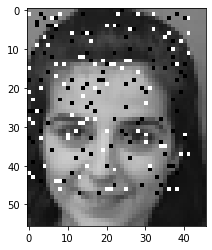

In [93]:
plt.imshow(salt_pepper_noise_ORL[10], cmap="gray")

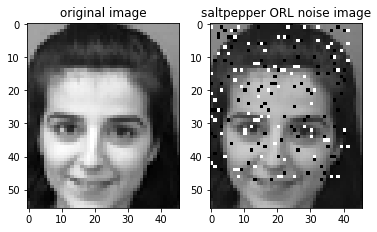

In [94]:
##see effect of adding saltpepper noise
plt.subplot(121)
plt.imshow(images_ORL[10], cmap="gray")
plt.title('original image')
plt.subplot(122)
restructured_ORL = salt_pepper(images, 0.1, 0.5, 48, 42)
plt.imshow(salt_pepper_noise_ORL[10], cmap="gray")
plt.title('saltpepper ORL noise image')
plt.show()

In [97]:
## add noise 2: gaussian noise
image_size_ORL = (images_ORL[0].shape[0], images_ORL[0].shape[1])
image_gause_ORL = gau_generation(images_ORL, image_size_ORL, g_ratio = 1)

In [98]:
image_size_ORL

(56, 46)

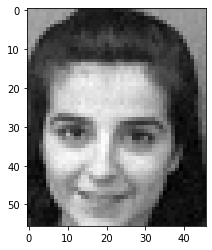

In [99]:
plt.imshow(image_gause_ORL[10], cmap="gray")

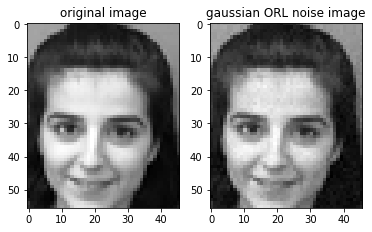

In [100]:
##see effect of adding gaussian noise
plt.subplot(121)
plt.imshow(images_ORL[10], cmap="gray")
plt.title('original image')
plt.subplot(122)
restructured_ORL = gau_generation(images_ORL, image_size_ORL, g_ratio = 2)
plt.imshow(image_gause_ORL[10], cmap="gray")
plt.title('gaussian ORL noise image')
plt.show()

### Data Preprocessing

In [101]:
np.array(images_ORL).shape

(400, 56, 46)

In [102]:
image_faces_ORL = (images_ORL)
image_faces_ORL = np.array(image_faces_ORL)
image_faces_ORL.shape

(400, 56, 46)

In [103]:
len(image_faces_ORL)

400

In [104]:
subsample_size_ORL = image_faces_ORL.shape[0]*0.2
subsample_size_ORL

80.0

In [105]:
# use a subsample for training
image_faces_train_ORL = image_faces_ORL[:80,:,:]
print("image_faces_train ORL shape:",image_faces_train_ORL.shape)
n_samples_ORL = len(image_faces_train_ORL)
print("n_samples size ORL:",n_samples_ORL)
image_shape_ORL = image_faces_train_ORL[0].shape
print("image shape ORL is:", image_shape_ORL)

image_faces_train ORL shape: (80, 56, 46)
n_samples size ORL: 80
image shape ORL is: (56, 46)


In [106]:
from random import sample

In [107]:
trial1_ORL = sample(images_ORL, 80)
trial2_ORL = sample(images_ORL, 80)
trial3_ORL = sample(images_ORL, 80)
trial4_ORL = sample(images_ORL, 80)
trial5_ORL = sample(images_ORL, 80)

In [108]:
trial1_ORL = np.array(trial1_ORL)
trial2_ORL = np.array(trial2_ORL)
trial3_ORL = np.array(trial3_ORL)
trial4_ORL = np.array(trial4_ORL)
trial5_ORL = np.array(trial5_ORL)

In [109]:
trial1_ORL.shape

(80, 56, 46)

In [110]:
trial_train1_ORL = trial1_ORL.reshape(trial1_ORL.shape[0], (trial1_ORL.shape[1]*trial1_ORL.shape[2]))
trial_train2_ORL = trial2_ORL.reshape(trial2_ORL.shape[0], (trial2_ORL.shape[1]*trial2_ORL.shape[2]))
trial_train3_ORL = trial3_ORL.reshape(trial3_ORL.shape[0], (trial3_ORL.shape[1]*trial3_ORL.shape[2]))
trial_train4_ORL = trial4_ORL.reshape(trial4_ORL.shape[0], (trial4_ORL.shape[1]*trial4_ORL.shape[2]))
trial_train5_ORL = trial5_ORL.reshape(trial5_ORL.shape[0], (trial5_ORL.shape[1]*trial5_ORL.shape[2]))


In [111]:
trial_train1_ORL.shape

(80, 2576)

In [112]:
trial1_gau_ORL = gau_generation(trial_train1_ORL, image_size_ORL, g_ratio=2)
trial2_gau_ORL = gau_generation(trial_train2_ORL, image_size_ORL, g_ratio=2)
trial3_gau_ORL = gau_generation(trial_train3_ORL, image_size_ORL, g_ratio=2)
trial4_gau_ORL = gau_generation(trial_train4_ORL, image_size_ORL, g_ratio=2)
trial5_gau_ORL = gau_generation(trial_train5_ORL, image_size_ORL, g_ratio=2)



In [113]:
trial1_gau_ORL = trial1_gau_ORL.reshape(trial1_gau_ORL.shape[0], (trial1_gau_ORL.shape[1]*trial1_gau_ORL.shape[2]))
trial2_gau_ORL = trial2_gau_ORL.reshape(trial2_gau_ORL.shape[0], (trial2_gau_ORL.shape[1]*trial2_gau_ORL.shape[2]))
trial3_gau_ORL = trial3_gau_ORL.reshape(trial3_gau_ORL.shape[0], (trial3_gau_ORL.shape[1]*trial3_gau_ORL.shape[2]))
trial4_gau_ORL = trial4_gau_ORL.reshape(trial4_gau_ORL.shape[0], (trial4_gau_ORL.shape[1]*trial4_gau_ORL.shape[2]))
trial5_gau_ORL = trial5_gau_ORL.reshape(trial5_gau_ORL.shape[0], (trial5_gau_ORL.shape[1]*trial5_gau_ORL.shape[2]))

In [114]:
trial1_gau_ORL.shape

(80, 2576)

In [115]:
trial1_salt_ORL = salt_pepper(trial1_ORL, 0.1, 0.5, 48, 42)
trial2_salt_ORL = salt_pepper(trial2_ORL, 0.1, 0.5, 48, 42)
trial3_salt_ORL = salt_pepper(trial3_ORL, 0.1, 0.5, 48, 42)
trial4_salt_ORL = salt_pepper(trial4_ORL, 0.1, 0.5, 48, 42)
trial5_salt_ORL = salt_pepper(trial5_ORL, 0.1, 0.5, 48, 42)

In [116]:
trial1_salt_ORL = trial1_salt_ORL.reshape(trial1_salt_ORL.shape[0], (trial1_salt_ORL.shape[1]*trial1_salt_ORL.shape[2]))
trial2_salt_ORL = trial2_salt_ORL.reshape(trial2_salt_ORL.shape[0], (trial2_salt_ORL.shape[1]*trial2_salt_ORL.shape[2]))
trial3_salt_ORL = trial3_salt_ORL.reshape(trial3_salt_ORL.shape[0], (trial3_salt_ORL.shape[1]*trial3_salt_ORL.shape[2]))
trial4_salt_ORL = trial4_salt_ORL.reshape(trial4_salt_ORL.shape[0], (trial4_salt_ORL.shape[1]*trial4_salt_ORL.shape[2]))
trial5_salt_ORL = trial5_salt_ORL.reshape(trial5_salt_ORL.shape[0], (trial5_salt_ORL.shape[1]*trial5_salt_ORL.shape[2]))




In [117]:
trial5_salt_ORL.shape

(80, 2576)

### NMF implementation

In [118]:
## visualize the progress of implementing code
from tqdm import tqdm

In [119]:
len(trial_train1_ORL)

80

In [120]:
image_size_ORL

(56, 46)

In [121]:
56*46

2576

In [122]:
def simpleNMF(R, K, steps=1000, max_iterations = 1000):
    rng = np.random.RandomState(1)
    W = rng.rand(80, K)
    H = rng.rand(2576, K)
    for step in range(steps):
        Wu = W*(R.dot(H))/(W.dot(H.T).dot(H))
        Hu = (H.T*(Wu.T.dot(R))/(Wu.T.dot(Wu).dot(H.T))).T
        
        e_W = np.sqrt(np.sum((Wu-W)**2, axis=(0,1)))/W.size
        e_H = np.sqrt(np.sum((Hu-H)**2, axis=(0,1)))/H.size
        if e_W<0.001 and e_H<0.001:
            print('step is:',step)
            break
        W = Wu
        H = Hu
        
    return  W, H

In [123]:
W, H = simpleNMF(trial_train1_ORL, 2, max_iterations=100)

step is: 200


In [124]:
print(np.shape(np.array(W)))
print(np.shape(np.array(H)))

(80, 2)
(2576, 2)


In [125]:
##n_components
len(set(labels_ORL))

40

In [126]:
##result after gaussian noises
W1_estimate_gau_ORL, H1_estimate_gau_ORL = simpleNMF(trial1_gau_ORL, 40, max_iterations=100)
W2_estimate_gau_ORL, H2_estimate_gau_ORL = simpleNMF(trial2_gau_ORL, 40, max_iterations=100)
W3_estimate_gau_ORL, H3_estimate_gau_ORL = simpleNMF(trial3_gau_ORL, 40, max_iterations=100)
W4_estimate_gau_ORL, H4_estimate_gau_ORL = simpleNMF(trial4_gau_ORL, 40, max_iterations=100)
W5_estimate_gau_ORL, H5_estimate_gau_ORL = simpleNMF(trial5_gau_ORL, 40, max_iterations=100)


step is: 2
step is: 2
step is: 2
step is: 2
step is: 2


In [127]:
W1_estimate_salt_ORL, H1_estimate_salt_ORL = simpleNMF(trial1_salt_ORL, 40, max_iterations=100)
W2_estimate_salt_ORL, H2_estimate_salt_ORL = simpleNMF(trial2_salt_ORL, 40, max_iterations=100)
W3_estimate_salt_ORL, H3_estimate_salt_ORL = simpleNMF(trial3_salt_ORL, 40, max_iterations=100)
W4_estimate_salt_ORL, H4_estimate_salt_ORL = simpleNMF(trial4_salt_ORL, 40, max_iterations=100)
W5_estimate_salt_ORL, H5_estimate_salt_ORL = simpleNMF(trial5_salt_ORL, 40, max_iterations=100)


step is: 2
step is: 2
step is: 2
step is: 2
step is: 2


In [128]:
W1_estimate_gau_ORL = np.array(W1_estimate_gau_ORL)
W2_estimate_gau_ORL = np.array(W2_estimate_gau_ORL)
W3_estimate_gau_ORL = np.array(W3_estimate_gau_ORL)
W4_estimate_gau_ORL = np.array(W4_estimate_gau_ORL)
W5_estimate_gau_ORL = np.array(W5_estimate_gau_ORL)

In [129]:
H1_estimate_gau_ORL = np.array(H1_estimate_gau_ORL)
H2_estimate_gau_ORL = np.array(H2_estimate_gau_ORL)
H3_estimate_gau_ORL = np.array(H3_estimate_gau_ORL)
H4_estimate_gau_ORL = np.array(H4_estimate_gau_ORL)
H5_estimate_gau_ORL = np.array(H5_estimate_gau_ORL)

In [130]:
W1_estimate_salt_ORL = np.array(W1_estimate_salt_ORL)
W2_estimate_salt_ORL = np.array(W2_estimate_salt_ORL)
W3_estimate_salt_ORL = np.array(W3_estimate_salt_ORL)
W4_estimate_salt_ORL = np.array(W4_estimate_salt_ORL)
W5_estimate_salt_ORL = np.array(W5_estimate_salt_ORL)

In [131]:
H1_estimate_salt_ORL = np.array(H1_estimate_salt_ORL)
H2_estimate_salt_ORL = np.array(H2_estimate_salt_ORL)
H3_estimate_salt_ORL = np.array(H3_estimate_salt_ORL)
H4_estimate_salt_ORL = np.array(H4_estimate_salt_ORL)
H5_estimate_salt_ORL = np.array(H5_estimate_salt_ORL)

In [132]:
print('==> Evaluate RRE on Gaussian noises.....')
RRE_gau1_ORL = np.linalg.norm((trial_train1_ORL - W1_estimate_gau_ORL.dot(H1_estimate_gau_ORL.T))) / np.linalg.norm(trial_train1_ORL)
RRE_gau2_ORL = np.linalg.norm((trial_train2_ORL - W2_estimate_gau_ORL.dot(H2_estimate_gau_ORL.T))) / np.linalg.norm(trial_train2_ORL)
RRE_gau3_ORL = np.linalg.norm((trial_train3_ORL - W3_estimate_gau_ORL.dot(H3_estimate_gau_ORL.T))) / np.linalg.norm(trial_train3_ORL)
RRE_gau4_ORL = np.linalg.norm((trial_train4_ORL - W4_estimate_gau_ORL.dot(H4_estimate_gau_ORL.T))) / np.linalg.norm(trial_train4_ORL)
RRE_gau5_ORL = np.linalg.norm((trial_train5_ORL - W5_estimate_gau_ORL.dot(H5_estimate_gau_ORL.T))) / np.linalg.norm(trial_train5_ORL)
print('RRE_gau1_ORL = {}'.format(RRE_gau1_ORL))
print('RRE_gau2_ORL = {}'.format(RRE_gau2_ORL))
print('RRE_gau3_ORL = {}'.format(RRE_gau3_ORL))
print('RRE_gau4_ORL = {}'.format(RRE_gau4_ORL))
print('RRE_gau5_ORL = {}'.format(RRE_gau5_ORL))


==> Evaluate RRE on Gaussian noises.....
RRE_gau1_ORL = 0.2849819070760367
RRE_gau2_ORL = 0.29197551181097986
RRE_gau3_ORL = 0.29458924777427437
RRE_gau4_ORL = 0.29405413379978534
RRE_gau5_ORL = 0.2953103491943323


In [133]:
total_gau_ORL = RRE_gau1_ORL+RRE_gau2_ORL+RRE_gau3_ORL+RRE_gau4_ORL+RRE_gau5_ORL
average_RRE_gau_ORL = total_gau_ORL / 5
print('average RRE gaussian for ORL={} '.format(average_RRE_gau_ORL))



average RRE gaussian for ORL=0.2921822299310817 


In [134]:
print('==> Evaluate RRE on Gaussian noises.....')
RRE_salt1_ORL = np.linalg.norm((trial_train1_ORL - W1_estimate_salt_ORL.dot(H1_estimate_salt_ORL.T))) / np.linalg.norm(trial_train1_ORL)
RRE_salt2_ORL = np.linalg.norm((trial_train2_ORL - W2_estimate_salt_ORL.dot(H2_estimate_salt_ORL.T))) / np.linalg.norm(trial_train2_ORL)
RRE_salt3_ORL = np.linalg.norm((trial_train3_ORL - W3_estimate_salt_ORL.dot(H3_estimate_salt_ORL.T))) / np.linalg.norm(trial_train3_ORL)
RRE_salt4_ORL = np.linalg.norm((trial_train4_ORL - W4_estimate_salt_ORL.dot(H4_estimate_salt_ORL.T))) / np.linalg.norm(trial_train4_ORL)
RRE_salt5_ORL = np.linalg.norm((trial_train5_ORL - W5_estimate_salt_ORL.dot(H5_estimate_salt_ORL.T))) / np.linalg.norm(trial_train5_ORL)
print('RRE_salt1_ORL = {}'.format(RRE_salt1_ORL))
print('RRE_salt2_ORL = {}'.format(RRE_salt2_ORL))
print('RRE_salt3_ORL = {}'.format(RRE_salt3_ORL))
print('RRE_salt4_ORL = {}'.format(RRE_salt4_ORL))
print('RRE_salt5_ORL = {}'.format(RRE_salt5_ORL))

==> Evaluate RRE on Gaussian noises.....
RRE_salt1_ORL = 0.28822509159835813
RRE_salt2_ORL = 0.2949582643695762
RRE_salt3_ORL = 0.29739385575203336
RRE_salt4_ORL = 0.29705838491240616
RRE_salt5_ORL = 0.298613823278962


In [135]:
total_salt_ORL = RRE_salt1_ORL+RRE_salt2_ORL+RRE_salt3_ORL+RRE_salt4_ORL+RRE_salt5_ORL
average_RRE_salt_ORL = total_salt_ORL / 5
print('average RRE salt pepper for ORL ={} '.format(average_RRE_salt_ORL))

average RRE salt pepper for ORL =0.29524988398226715 


### Evaluate Clustering Performance

In [136]:
Y_hat_1_ORL = sample(labels_ORL, 80)
Y_hat_2_ORL = sample(labels_ORL, 80)
Y_hat_3_ORL = sample(labels_ORL, 80)
Y_hat_4_ORL = sample(labels_ORL, 80)
Y_hat_5_ORL = sample(labels_ORL, 80)

In [137]:
Y_hat_1_ORL = np.array(Y_hat_1_ORL)
Y_hat_2_ORL = np.array(Y_hat_2_ORL)
Y_hat_3_ORL = np.array(Y_hat_3_ORL)
Y_hat_4_ORL = np.array(Y_hat_4_ORL)
Y_hat_5_ORL = np.array(Y_hat_5_ORL)

In [138]:
print('==> Evaluate Acc and NMI ...')

# Assign cluster labels.
Y_pred1_gau_ORL = assign_cluster_label(W1_estimate_gau_ORL, Y_hat_1_ORL)
acc = accuracy_score(Y_hat_1_ORL, Y_pred1_gau_ORL)
nmi = normalized_mutual_info_score(Y_hat_1_ORL, Y_pred1_gau_ORL)
print('Acc(NMI) for gauss 1 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred2_gau_ORL = assign_cluster_label(W2_estimate_gau_ORL, Y_hat_2_ORL)
acc = accuracy_score(Y_hat_2_ORL, Y_pred2_gau_ORL)
nmi = normalized_mutual_info_score(Y_hat_2_ORL, Y_pred2_gau_ORL)
print('Acc(NMI) for gauss 2 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred3_gau_ORL = assign_cluster_label(W3_estimate_gau_ORL, Y_hat_3_ORL)
acc = accuracy_score(Y_hat_3_ORL, Y_pred3_gau_ORL)
nmi = normalized_mutual_info_score(Y_hat_3_ORL, Y_pred3_gau_ORL)
print('Acc(NMI) for gauss 3 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred4_gau_ORL = assign_cluster_label(W4_estimate_gau_ORL, Y_hat_4_ORL)
acc = accuracy_score(Y_hat_4_ORL, Y_pred4_gau_ORL)
nmi = normalized_mutual_info_score(Y_hat_4_ORL, Y_pred4_gau_ORL)
print('Acc(NMI) for gauss 4 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred5_gau_ORL = assign_cluster_label(W5_estimate_gau_ORL, Y_hat_5_ORL)
acc = accuracy_score(Y_hat_5_ORL, Y_pred5_gau_ORL)
nmi = normalized_mutual_info_score(Y_hat_5_ORL, Y_pred5_gau_ORL)
print('Acc(NMI) for gauss 5 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))

==> Evaluate Acc and NMI ...
Acc(NMI) for gauss 1 _ORL = 0.5375 (0.7737)
Acc(NMI) for gauss 2 _ORL = 0.4750 (0.6965)
Acc(NMI) for gauss 3 _ORL = 0.5000 (0.7379)
Acc(NMI) for gauss 4 _ORL = 0.4625 (0.6980)
Acc(NMI) for gauss 5 _ORL = 0.4875 (0.7171)


In [139]:
print('average accuracy for gauss ORL is:',(0.45 + 0.4625 + 0.5250 + 0.4750 + 0.4625)/5)

average accuracy for gauss ORL is: 0.475


In [140]:
print('average NMI for gauss ORL is:',(0.6451 + 0.6895 + 0.7259 + 0.7102+ 0.7045)/5)

average NMI for gauss ORL is: 0.69504


In [141]:
print('==> Evaluate Acc and NMI ...')

# Assign cluster labels.
Y_pred1_salt_ORL = assign_cluster_label(W1_estimate_salt_ORL, Y_hat_1_ORL)
acc = accuracy_score(Y_hat_1_ORL, Y_pred1_salt_ORL)
nmi = normalized_mutual_info_score(Y_hat_1_ORL, Y_pred1_salt_ORL)
print('Acc(NMI) for salt 1 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred2_salt_ORL = assign_cluster_label(W2_estimate_salt_ORL, Y_hat_2_ORL)
acc = accuracy_score(Y_hat_2_ORL, Y_pred2_salt_ORL)
nmi = normalized_mutual_info_score(Y_hat_2_ORL, Y_pred2_salt_ORL)
print('Acc(NMI) for salt 2 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred3_salt_ORL = assign_cluster_label(W3_estimate_salt_ORL, Y_hat_3_ORL)
acc = accuracy_score(Y_hat_3_ORL, Y_pred3_salt_ORL)
nmi = normalized_mutual_info_score(Y_hat_3_ORL, Y_pred3_salt_ORL)
print('Acc(NMI) for salt 3 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred4_salt_ORL = assign_cluster_label(W4_estimate_salt_ORL, Y_hat_4_ORL)
acc = accuracy_score(Y_hat_4_ORL, Y_pred4_salt_ORL)
nmi = normalized_mutual_info_score(Y_hat_4_ORL, Y_pred4_salt_ORL)
print('Acc(NMI) for salt 4 _ORL= {:.4f} ({:.4f})'.format(acc, nmi))
Y_pred5_salt_ORL = assign_cluster_label(W5_estimate_salt_ORL, Y_hat_5_ORL)
acc = accuracy_score(Y_hat_5_ORL, Y_pred5_salt_ORL)
nmi = normalized_mutual_info_score(Y_hat_5_ORL, Y_pred5_salt_ORL)
print('Acc(NMI) for salt 5 _ORL = {:.4f} ({:.4f})'.format(acc, nmi))

==> Evaluate Acc and NMI ...
Acc(NMI) for salt 1 _ORL = 0.5125 (0.7476)
Acc(NMI) for salt 2 _ORL = 0.4750 (0.7033)
Acc(NMI) for salt 3 _ORL = 0.5000 (0.7330)
Acc(NMI) for salt 4 _ORL= 0.4375 (0.6736)
Acc(NMI) for salt 5 _ORL = 0.5375 (0.7352)


In [142]:
print('average accuracy for salt pepper ORL is:', (0.4750+0.4500+0.5125+0.4625+0.4500)/5)

average accuracy for salt pepper ORL is: 0.47000000000000003


In [143]:
print('average NMI for salt pepper ORL is:', (0.6869+0.6856+0.72+0.7014+0.6958)/5)

average NMI for salt pepper ORL is: 0.69794


In [144]:
## Define a L1-RNMF class
class L1RNMF1( ):
    def __init__(
            self,
            n_components,
            tol=0.01,
            max_iter=300,
            skip_iter=10,
            lambda_=128):
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.skip_iter = skip_iter
        self.lambda_ = lambda_

    def _compute_loss(self, R, W, H, E):
        return (np.linalg.norm(R - W.dot(H) - E) ** 2 +
                128 * np.sum(np.abs(E)))

    def _update(self, R, W, H):
        # compute E
        E = R - W.dot(H)
        idx_gre = E > 128 / 2
        E[idx_gre] = E[idx_gre] - 128 / 2
        idx_les = E < -128 / 2
        E[idx_les] = E[idx_les] + 128 / 2
        E[np.logical_not(np.logical_or(idx_gre, idx_les))] = 0
        
        # update W
        de_W = 2 * W.dot(H).dot(H.T)
        de_W[de_W == 0] = np.finfo(np.float32).eps
        W = (W * (np.abs((E-R).dot(H.T)) - (E-R).dot(H.T)) /
             de_W)
        
        # update H
        de_H = 2 * W.T.dot(W).dot(H)
        de_H[de_H == 0] = np.finfo(np.float32).eps
        H = (H * (np.abs(W.T.dot(E-R)) - W.T.dot(E-R)) /
             de_H)
    
        # normalize W and H
        nor = np.sqrt(np.sum(np.square(W), axis=0, keepdims=True))
        W = W / nor
        H = H * nor.T
        return W, H, E

    def fit(self, R , n_components):
       
        rng = np.random.RandomState(1)
        W = rng.rand(80, n_components)
        H = rng.rand( n_components,2576)

        los = [self._compute_loss(R, W, H, R - W.dot(H))]
        for iter_ in range(300):
            W, H, E = self._update(R, W, H)
            if iter_ % self.skip_iter == 0:
                los.append(self._compute_loss(R, W, H, E))
                criterion = abs(los[-1] - los[-2]) / los[-2]
            if criterion < 0.001:
                 break
        return W, H, E

In [145]:
data_L1RNMF = L1RNMF1(n_components = len(set(labels)))

In [146]:
##result after gaussian noises
W1_estimate_gau_ORL_1, H1_estimate_gau_ORL_1, E_estimate_gau_ORL_1 = data_L1RNMF.fit(trial1_gau_ORL, n_components = len(set(labels_ORL)))
W2_estimate_gau_ORL_1, H2_estimate_gau_ORL_1, E_estimate_gau_ORL_1 = data_L1RNMF.fit(trial2_gau_ORL, n_components = len(set(labels_ORL)))
W3_estimate_gau_ORL_1, H3_estimate_gau_ORL_1, E_estimate_gau_ORL_1 = data_L1RNMF.fit(trial3_gau_ORL, n_components = len(set(labels_ORL)))
W4_estimate_gau_ORL_1, H4_estimate_gau_ORL_1, E_estimate_gau_ORL_1 = data_L1RNMF.fit(trial4_gau_ORL, n_components = len(set(labels_ORL)))
W5_estimate_gau_ORL_1, H5_estimate_gau_ORL_1, E_estimate_gau_ORL_1 = data_L1RNMF.fit(trial5_gau_ORL, n_components = len(set(labels_ORL)))

In [147]:
##result after saltpepper noises
W1_estimate_salt_ORL_1, H1_estimate_salt_ORL_1, E_estimate_salt_ORL_1 = data_L1RNMF.fit(trial1_salt_ORL, n_components = len(set(labels_ORL)))
W2_estimate_salt_ORL_1, H2_estimate_salt_ORL_1, E_estimate_salt_ORL_1 = data_L1RNMF.fit(trial2_salt_ORL, n_components = len(set(labels_ORL)))
W3_estimate_salt_ORL_1, H3_estimate_salt_ORL_1, E_estimate_salt_ORL_1 = data_L1RNMF.fit(trial3_salt_ORL, n_components = len(set(labels_ORL)))
W4_estimate_salt_ORL_1, H4_estimate_salt_ORL_1, E_estimate_salt_ORL_1 = data_L1RNMF.fit(trial4_salt_ORL, n_components = len(set(labels_ORL)))
W5_estimate_salt_ORL_1, H5_estimate_salt_ORL_1, E_estimate_salt_ORL_1 = data_L1RNMF.fit(trial5_salt_ORL, n_components = len(set(labels_ORL)))

In [151]:
print('==> Evaluate RRE on Gaussian noises via L1RNMF.....')
RRE_gau1_ORL_1 = np.linalg.norm((trial_train1_ORL - np.array(W1_estimate_gau_ORL_1).dot(np.array(H1_estimate_gau_ORL_1)))) / np.linalg.norm(trial_train1_ORL)
RRE_gau2_ORL_1 = np.linalg.norm((trial_train2_ORL - np.array(W2_estimate_gau_ORL_1).dot(np.array(H2_estimate_gau_ORL_1)))) / np.linalg.norm(trial_train2_ORL)
RRE_gau3_ORL_1 = np.linalg.norm((trial_train3_ORL - np.array(W3_estimate_gau_ORL_1).dot(np.array(H3_estimate_gau_ORL_1)))) / np.linalg.norm(trial_train3_ORL)
RRE_gau4_ORL_1 = np.linalg.norm((trial_train4_ORL - np.array(W4_estimate_gau_ORL_1).dot(np.array(H4_estimate_gau_ORL_1)))) / np.linalg.norm(trial_train4_ORL)
RRE_gau5_ORL_1 = np.linalg.norm((trial_train5_ORL - np.array(W5_estimate_gau_ORL_1).dot(np.array(H5_estimate_gau_ORL_1)))) / np.linalg.norm(trial_train5_ORL)
print('RRE_gau1_ORL_1 = {}'.format(RRE_gau1_ORL_1))
print('RRE_gau2_ORL_1 = {}'.format(RRE_gau2_ORL_1))
print('RRE_gau3_ORL_1 = {}'.format(RRE_gau3_ORL_1))
print('RRE_gau4_ORL_1 = {}'.format(RRE_gau4_ORL_1))
print('RRE_gau5_ORL_1 = {}'.format(RRE_gau5_ORL_1))
total_gau_ORL_1 = RRE_gau1_ORL_1+RRE_gau2_ORL_1+RRE_gau3_ORL_1+RRE_gau4_ORL_1+RRE_gau5_ORL_1
average_RRE_gau_ORL_1 = total_gau_ORL_1 / 5
print('average RRE gaussian for ORL via L1RNMF={} '.format(average_RRE_gau_ORL_1))

==> Evaluate RRE on Gaussian noises via L1RNMF.....
RRE_gau1_ORL_1 = 0.11766725185172355
RRE_gau2_ORL_1 = 0.11706065976021382
RRE_gau3_ORL_1 = 0.1196516359838736
RRE_gau4_ORL_1 = 0.11946527245513675
RRE_gau5_ORL_1 = 0.12159662823238898
average RRE gaussian for ORL via L1RNMF=0.11908828965666736 


In [150]:
print('==> Evaluate RRE on Saltpepper noises via L1RNMF.....')
RRE_salt1_ORL_1 = np.linalg.norm((trial_train1_ORL - np.array(W1_estimate_salt_ORL_1).dot(np.array(H1_estimate_salt_ORL_1)))) / np.linalg.norm(trial_train1_ORL)
RRE_salt2_ORL_1 = np.linalg.norm((trial_train2_ORL - np.array(W2_estimate_salt_ORL_1).dot(np.array(H2_estimate_salt_ORL_1)))) / np.linalg.norm(trial_train2_ORL)
RRE_salt3_ORL_1 = np.linalg.norm((trial_train3_ORL - np.array(W3_estimate_salt_ORL_1).dot(np.array(H3_estimate_salt_ORL_1)))) / np.linalg.norm(trial_train3_ORL)
RRE_salt4_ORL_1 = np.linalg.norm((trial_train4_ORL - np.array(W4_estimate_salt_ORL_1).dot(np.array(H4_estimate_salt_ORL_1)))) / np.linalg.norm(trial_train4_ORL)
RRE_salt5_ORL_1 = np.linalg.norm((trial_train5_ORL - np.array(W5_estimate_salt_ORL_1).dot(np.array(H5_estimate_salt_ORL_1)))) / np.linalg.norm(trial_train5_ORL)

print('RRE_salt1_ORL_1 = {}'.format(RRE_salt1_ORL_1))
print('RRE_salt2_ORL_1 = {}'.format(RRE_salt2_ORL_1))
print('RRE_salt3_ORL_1 = {}'.format(RRE_salt3_ORL_1))
print('RRE_salt4_ORL_1 = {}'.format(RRE_salt4_ORL_1))
print('RRE_salt5_ORL_1 = {}'.format(RRE_salt5_ORL_1))
total_salt_ORL_1 = RRE_salt1_ORL_1+RRE_salt2_ORL_1+RRE_salt3_ORL_1+RRE_salt4_ORL_1+RRE_salt5_ORL_1
average_RRE_salt_ORL_1 = total_salt_ORL_1 / 5
print('average RRE Saltpepper for ORL via L1RNMF={} '.format(average_RRE_salt_ORL_1))

==> Evaluate RRE on Saltpepper noises via L1RNMF.....
RRE_salt1_ORL_1 = 0.1950933674800396
RRE_salt2_ORL_1 = 0.19338739717484532
RRE_salt3_ORL_1 = 0.197358632489274
RRE_salt4_ORL_1 = 0.19716713810954328
RRE_salt5_ORL_1 = 0.2058769830092876
average RRE Saltpepper for ORL via L1RNMF=0.19777670365259795 
